# Data Clustering and Segmentation Analysis
## Robust k-medoids in Action - Part 2 Model Development
<b>Author:</b> Jacob Cybulski<br>
<b>Version:</b> V1.5, Sept 2019

<b>Data:</b> Ames Housing Dataset<br>
<b>Prepared by:</b> Dean De Cock, <a href="http://jse.amstat.org/v19n3/decock.pdf" target="new">"Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester Regression Project"</a>, Journal of Statistics Education, Volume 19, Number 3(2011). With <a href="http://jse.amstat.org/v19n3/decock/AmesHousing.txt" target="new">data</a> and <a href="http://jse.amstat.org/v19n3/decock/DataDocumentation.txt" target="new">description</a>.<br>
<b>Kaggle URL:</b> https://www.kaggle.com/prevek18/ames-housing-dataset 

<b>Challenge Data:</b> Melbourne Real Estate Dataset<br>
<b>Kaggle URL:</b> https://www.kaggle.com/anthonypino/melbourne-housing-market

<b>Problem:</b> Identify groups of similar houses and analyse them.

<b>Method:</b> Feature Engineering, k-Medoids, PCA, Visualisation, Diagnostics, Segmentation Analysis

# Introduction

## Some definitions

<b><span style="color:red">Data clustering</span></b><i> (also known as <b>data segmentation</b>) is the unsupervised method of grouping data so that data points in the same group (called <b>cluster</b>) are more similar to each other than to those in other groups. The process of cluster creation can be viewed as an iterative multi-objective optimisation. 

</i><b><span style="color:red">Cluster diagnostics</span></b><i> is the process of assessing the quality of the clustering system. It usually focuses on ensuring cluster cohesion (i.e. similar data points belong to the same cluster), cluster separation (i.e. different data points belong to different clusters and cluster centers are far apart), minimisation of cluster fragmentation (i.e. few small clusters). 

</i><b><span style="color:red">Cluster analysis</span></b><i> (also known as <b>segmentation analysis</b>) is a knowledge discovery process of learning about data by interpreting data relationships via the emerging cluster properties (possibly also via existing categorical variables).</i>

## Aims of data clustering vs representation
<i>There are several objectives of data clustering. First and the most common is to group data points that could be used for <b>data understanding</b>. Second is to <b>reduce volumne of data</b> by treating their groups (or their representatives) as a new data set. Third is to rely on the fuzzy membership measures to create new variables, which could <b>enrich data</b> or replace existing variables and so <b>reduce data dimensionality</b>. Each of those aims leads to a different data representation - often all such representations co-exists as a result of data clustering.</i>

<img src="Images/cluster_aims_vs_representation.png">

## Other objectives
<i>Other important objectives of data clustering include:
    <ul><li>Clustered data and the clustering process verifiably meet their explicitly stated objectives</li>
        <li>Once established, the clustering process can be used to determine cluster membership for new data</li>
        <li>Clustered data retains as much of the original data properties and their richness as possible</li>
        <li>The process of data clustering can assist determination of its pre-requsite conditions</li>
    </ul></i>

## Approaches to data clustering
<i>The most common approaches to data clustering are the following three.</i>

<b><span style="color:red">Centroid-based clustering</span></b><i> focusing on identifying the centers of clusters and allocation cluster members to optimise some quality measure. Examples include <b>k-means</b> where cluster center is defined by the mean of the cluster member data, and, <b>k-medoid</b>, such as PAM, where the centers are defined by the actual data point which minimises the cluster dissimilarity measures. The number of clusters needs to be specified apriori and variables to be independent, numerical, normalised (or weighed) and outlier free. In spite of tough requirements imposed on data preparation, because of the efficiency of clustering algorithms, distance-based methods are the most commonly used in practice.</i>

<b><span style="color:red">Density-based clustering</span></b><i> aims to separate data points into high-density and low-density groups (considered as noise or boundary items). The groups are determined by linking data in their immediate neighbourhood. The method is resitant to outliers (it actually helps identifying them) and great in identifying irregularly shaped clusters. However, it is still based on numerical and scaled distance measures, it struggles with high-dimensional data and cannot cope with data of varying densities.</i>

<b><span style="color:red">Hierarchical clustering</span></b><i> (a subclass of <b>connectivity-based clustering</b>) derives clusters from hierarchical relationships in data, which could be derived in <b>agglomerative</b> (bottom-up) or <b>divisive</b> (top-down) fashion. While it is common for the clustering process to rely on data point distances, it is also possible to use other measures of data point relationships thus allowing non-numeric data. They generally suffer from the presence of outliers and divisive methods are very slow. Not popular aming the machine-learning community in general, however, elements of agglomerative methods can be found in many optimisatoin algorithms.</i>

<img src="Images/clustering_approaches_v2.png">

<b><span style="color:red">Other methods</span></b><i> include <b>model based</b> that use maximum likelihood estimation or Bayesian optimisation to find the best cluster model, <b>distribution-based clustering</b>, which relies on drawing and joining data samples from the same statistical distribution, <b>correlation clustering</b> analysing correlation between data attributes, and <b>mutual information clustering</b> based on entropy based methods, as well as, various <b>hybrid clustering methods</b>, etc.</i>

# Data clustering in R
<i>R provides support for all types of clustering methods. For example, the R core (stats) provides a kmeans function. Whereas the popular "cluster" package supports agglomerative clustering (agnes), medoid-based clustering (pam), fuzzy clustering (fanny), and clustering of very large data sets (clara). A number of cluster metrics are also available in the "cluster" package, e.g. silhouette, gap statistic and dissimilarity measures.

In this notebook we will explain one of the most commonly used clustering algorithms - </i><b><span style="color:red">Partitioning Around Medoids (PAM)</span></b><i>, which is a distance-based clustering approach. In the past the PAM algorithm suffered from inefficiencies on large data sets. However, in recent years various optimisatoin techniques have been applied to make it a fast and effective clustering algorithms. Being a medoid-based PAM is more robust than k-means in handling data with outliers.
</i>

### The process of data clustering

<p style="text-align:left"><i>
Here we suggest two alternative processes for data preparation, clustering, diagnostics and interpretation or analysis. Both methods need to be able to deploy a clustering system for future cluster prediction, i.e. allocation of new data to existing clusters.</p>
<table style="float:left; text-align:left; width: 90%;">
    <tr><th style="text-align:left">
        Commonly used<br><b>
        Often based on linear models</b></th>
        <th style="text-align:left"><b><span style="color:red">
        Robust approach<br>
        Adopted in this notebook</span></b>
        </th></tr>
    <tr><td style="text-align:left; vertical-align:top">
        Data acqusition<br>
        Basic data preparation
        <ul><li>Selection of variables</li>
            <li>Elimination of missing values</li>
            <li>Standardisation of variables</li>
        </ul>
        </td>
        <td style="text-align:left; vertical-align:top">
        Data acqusition<br>
        Basic data preparation
        <ul><li>Selection of variables</li>
            <li>Elimination of missing values</li>
            <li>Standardisation of variables</li>
        </ul>
        </td>
    </tr>
    <tr><td style="text-align:left; vertical-align:top">
        Feature elimination
        <ul><li>Elimination of complete-aliased variables</li>
            <li>Elimination of highly co-linear variables</li>
        </ul>
        </td>
        <td style="text-align:left; vertical-align:top">
        Robust PCA (e.g. princomp with covmat=cov.rob)
        <ul><li>PCA diagnostics</li>
            <li>PCA optimisation</li>
            <li>Dimensionality reduction</li>
            </ul>
        </td>
    </tr>
    <tr><td style="text-align:left; vertical-align:top">
        Iterative outlier detection and elimination
        <ul><li>Create a linear model</li>
            <li>Cook's distance to identify high-leverage data</li>
            <li>Elimination of extremes</li>
        </ul>
        </td>
        <td style="text-align:left; vertical-align:top">
        Optional outlier elimination (e.g. ROSPCA)
        <ul><li>Identification of score distance outliers</li>
            <li>Identification of orthogonal outliers</li>
            <li>Elimination of outliers</li>
        </ul>
        </td>
    </tr>
    <tr><td style="text-align:left; vertical-align:top">
        Iterative and exploratory data clustering
        <ul><li>Identification of best cluster number(s)</li>
            <li>Creation of a clustering system</li>
            <li>Cluster visualisation and diagnostics</li>
            <li>Segmentation visualisation and analysis</li>
        </ul>
        Utility PCA for cluster visualisation (e.g. prcomp or princomp)
        <ul><li>PCA diagnostics and optimisation</li>
            </ul>
        </td>
        <td style="text-align:left; vertical-align:top">
        Iterative and exploratory data clustering
        <ul><li>Identification of best cluster number(s) in PCA coords</li>
            <li>Creation of a clustering system in PCA coords</li>
            <li>Cluster visualisation and diagnostics in PCA coords</li>
            <li>Segmentation visualisation and analysis in real coords</li>
        </ul>
        </td>
    </tr>
    <tr><td style="text-align:left; vertical-align:top">
        <b>Clustering system deployment and application to new data</b>
        </td>
        <td style="text-align:left; vertical-align:top">
            <b>Clustering system deployment and application to new data</b>
        </td>
    </tr>
</table></i>

## Demonstration

### Required libraries
<i>The R libraries used here are to support clustering, PCA and data visualisation. Note however that whenever possible will be using the <b>caret</b> pre-processing functions to allow all models (pre-processing, PCA and clustering) to be saved and later used in the process deployment and application to new data. The following libraries have been selected here to support both robust and non-robust processes.</i>

In [1]:
# install.packages("caret", dependencies = TRUE, repos="http://cran.us.r-project.org")
# install.packages("ggplot2", dependencies = TRUE, repos="http://cran.us.r-project.org")
# install.packages("psych", dependencies = TRUE, repos="http://cran.us.r-project.org")
# install.packages("car", dependencies = TRUE, repos="http://cran.us.r-project.org")
# install.packages("cluster", dependencies = TRUE, repos="http://cran.us.r-project.org")
# install.packages("factoextra", dependencies = TRUE, repos="http://cran.us.r-project.org")
# install.packages("tidyr", dependencies = TRUE, repos="http://cran.us.r-project.org")
# install.packages("alluvial", dependencies = TRUE, repos="http://cran.us.r-project.org")
# install.packages("rospca", dependencies = TRUE, repos="http://cran.us.r-project.org")
# install.packages("stringr", dependencies = TRUE, repos="http://cran.us.r-project.org")

# ip <- as.data.frame(installed.packages()[,c(1,3:4)])
# rownames(ip) <- NULL
# ip <- ip[is.na(ip$Priority),1:2,drop=FALSE]
# print(ip, row.names=FALSE)

In [3]:
# Where are the libraries
.libPaths()

# Use only the following packages
require(caret) # preProcess
require(ggplot2) # ggplot
require(cluster) # pam, silhouette
require(factoextra) # fviz_nbclust, fviz_pca_ind, fviz_pca_var, fviz_add
require(alluvial) # alluvial
require(stringr) # str_replace_all

[1] "/home/jacob/R/x86_64-pc-linux-gnu-library/3.5" 
[2] "/home/jacob/anaconda3/envs/rstat/lib/R/library"

In [4]:
# Utilities to plot clustered data (using ggplot)
source("clustering_101_util.r")

## Acquire data
<i>This data set describes real-estate properties sold in Ames, Iowa (USA) in the period 2006 to 2010. The data has 2930 observations, described with 82 variables, some with missing values. It is commonly used to train a model (e.g. regression) to predict a sale price. In this notebook we will use this data set to illustrate medoid-based cluster analysis.</i>

<i>We will also start with data preparation for training the cluster system. The initial step is to ensure that unique identifiers of all observations are preserved through the process of data manipulation. Thus the data IDs will be tested for uniqueness and then converted to row names.</i>

In [5]:
# Read the data from the CSV file
train.houses <- read.csv(file = "Data/AmesHousing-Train.csv", header = TRUE)
cat(paste("Train Data: ", nrow(train.houses), " observations"))

Train Data:  2000  observations

In [6]:
# Deal with ID attributes
cat(ifelse(length(train.houses$PID) == length(unique(train.houses$PID)), 
      "All IDs are unique", "Some IDs are not unique"))
rownames(train.houses) <- train.houses$PID
train.houses <- subset(train.houses, select=-c(Order, PID, X))
head(train.houses)

All IDs are unique

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,⋯,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice
,<int>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<int>
528172075,60,RL,92,10732,Pave,NA,IR1,Lvl,AllPub,Corner,⋯,0,NA,NA,NA,0,2,2007,New,Partial,250000
535450310,50,RL,78,10496,Pave,NA,Reg,Lvl,AllPub,Inside,⋯,0,NA,GdWo,NA,0,1,2007,WD,Normal,143000
528431030,20,RL,76,10612,Pave,NA,Reg,Lvl,AllPub,Inside,⋯,0,NA,NA,NA,0,1,2007,WD,Family,215000
534276040,20,RL,70,9100,Pave,NA,Reg,Lvl,AllPub,Inside,⋯,0,NA,NA,Shed,450,10,2009,WD,Normal,127500
527380240,60,RL,NA,14311,Pave,NA,IR1,Lvl,AllPub,FR3,⋯,0,NA,GdPrv,NA,0,6,2008,WD,Normal,306000
907187030,60,RL,57,8924,Pave,NA,IR1,Lvl,AllPub,CulDSac,⋯,0,NA,NA,NA,0,7,2008,WD,Normal,188000


<p style="text-align:right"><b>
    Note that ID column has become row names.
 </b></p>

## Selection of variables
<i>With few exceptions clustering algoriths require that all data is numerical. This means that should we require any of the categorical variables to be used in cluster creation they need to be converted to numerical values, e.g. using dummy encoding (see below). For simplicity, in this notebook we will use numerical variables only.</i>

### Consideration of categorical variables

In [7]:
## Optional: More is not necessarily be better!
## Dummy variables wil generate zero IQR may will not be accepted by robust PCA!

# Add the selected factors as dummy vars and deal with spaces in column names
# Note: Regionname was excluded because of Lat and long vars
# Warning: this could add NAs

# dummies.model <- dummyVars(~ MS_Zoning + Street + Sale_Condition, data = train.houses, 
#   fullRank = TRUE, drop2nd = TRUE)
# train.houses <- cbind(train.houses, predict(dummies.model, newdata = train.houses))
# names(train.houses)<-str_replace_all(names(train.houses), c(" " = ".", "-" = "."))
# train.houses <- subset(train.houses, select=-c(MS_Zoning, Street, Sale_Condition))

<p style="text-align:right"><b>
    As k-means and k-medoids algorithms do not work with nominal variables,<br>
    we can either dummy-encode nominal variables into numerical values (as above).<br>
    Alternatively, we can rely on mixed measures of distance.
 </b></p>

### Select numeric columns only

In [8]:
# Select only numerical variables
train.houses <- train.houses[,sapply(train.houses, is.numeric)]
str(train.houses)

'data.frame':	2000 obs. of  37 variables:
 $ MS_SubClass    : int  60 50 20 20 60 60 60 50 20 20 ...
 $ Lot_Frontage   : int  92 78 76 70 NA 57 99 51 93 130 ...
 $ Lot_Area       : int  10732 10496 10612 9100 14311 8924 12099 4712 12085 11457 ...
 $ Overall_Qual   : int  8 6 8 6 8 7 8 4 8 6 ...
 $ Overall_Cond   : int  5 6 5 6 5 5 5 7 5 5 ...
 $ Year_Built     : int  2006 1949 2006 1959 1996 1998 2004 1946 2007 1988 ...
 $ Year_Remod.Add : int  2007 1950 2006 1959 1996 1999 2004 1950 2007 1988 ...
 $ Mas_Vnr_Area   : int  0 320 248 0 402 0 388 0 328 0 ...
 $ BsmtFin_SF_1   : int  0 196 28 612 1023 0 970 384 1004 1005 ...
 $ BsmtFin_SF_2   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Bsmt_Unf_SF    : int  1298 844 1496 252 213 880 166 363 730 387 ...
 $ Total_Bsmt_SF  : int  1298 1040 1524 864 1236 880 1136 747 1734 1392 ...
 $ X1st_Flr_SF    : int  1298 1168 1534 864 1236 880 1136 774 1734 1412 ...
 $ X2nd_Flr_SF    : int  530 678 0 0 1104 844 1332 456 0 0 ...
 $ Low_Qual_Fin_SF: int  0 0 0 0 0 0

## Elimination of missing values
<i>Missing values are commonly a problem for the majority of clustering algorithms. We will test all variables for the percentage of missingness. Those variables which have very large proportion of missing values will be eliminated. The remaining ones will be imputed using the simplest method (by median or using k-NN predictive imputation).</i>

In [9]:
# Find the percentage of missing values in each column
cat("Percentage of missing values in selected variables\n")
head(sort(colMeans(is.na(train.houses)), decreasing = TRUE), 7)

Percentage of missing values in selected variables


Lot_Frontage Garage_Yr_Blt  Mas_Vnr_Area  BsmtFin_SF_1  BsmtFin_SF_2 
       0.1615        0.0575        0.0070        0.0005        0.0005 
  Bsmt_Unf_SF Total_Bsmt_SF 
       0.0005        0.0005

In [10]:
# Drop columns with the large number of missing values
# train.houses <- subset(train.houses, select=-c())

In [11]:
# Impute missing values for the remaining columns
# impute.model <- preProcess(std.houses, method = c("knnImpute"))
impute.model <- preProcess(train.houses, method = c("medianImpute"))
train.houses <- predict(impute.model, train.houses)

# Check that imputation worked
cat("Percentage of missing values in selected variables after imputation\n")
head(sort(colMeans(is.na(train.houses)), decreasing = TRUE), 7)

Percentage of missing values in selected variables after imputation


MS_SubClass   Lot_Frontage       Lot_Area   Overall_Qual   Overall_Cond 
             0              0              0              0              0 
    Year_Built Year_Remod.Add 
             0              0

 <p style="text-align:right"><b>
    Note that imputation method was captured as a pre-processing model.<br>
    At this point we have data frame "train.houses" with:</b></p>
<table style="float:right">
    <tr><td>
        All variables numerical<br>
        No missing values
    </td></tr>
</table>

## Standardisation of variables
<i>The robust PCA used below can cope with data which is not scaled and not centered (by using SVD). However, to ensure that all variables are treated equally due to the differences in data units, we will standardised them all, i.e. we will center and scale the variables.</i>

In [12]:
# Start working with a copy
std.houses <- train.houses

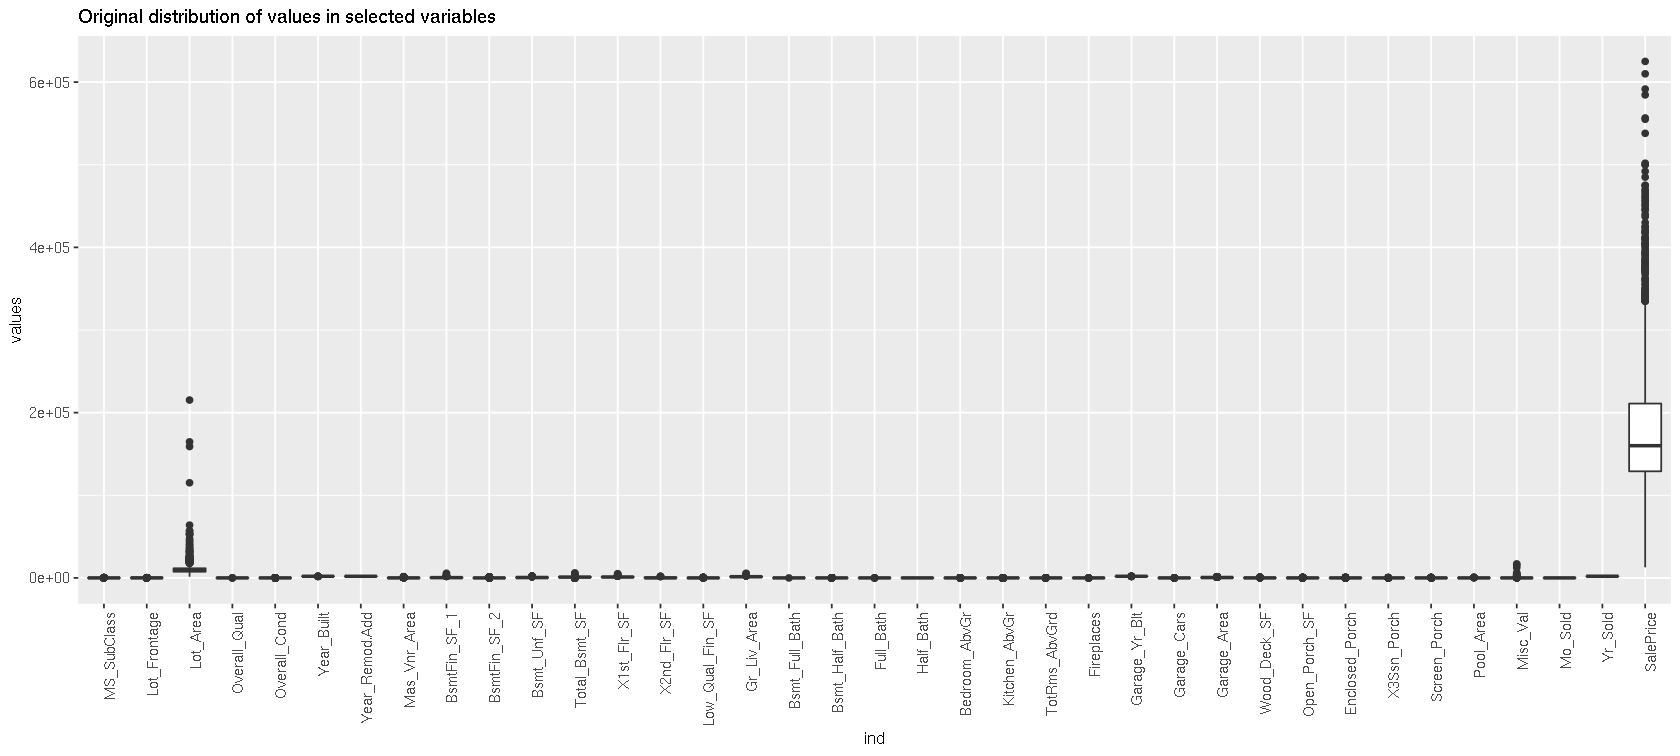

In [13]:
# Standardise variables
# Warning: this may generate NAs
set_plot_dimensions(2, 0.9)
ggplot(stack(std.houses), aes(x = ind, y = values)) + 
  geom_boxplot() +
  ggtitle("Original distribution of values in selected variables") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

<p style="text-align:right"><b>
    Note huge discrepancy in variable scales.<br>
    In clustering this will lead to "favouring" one var over the others
 </b></p>

In [14]:
# Scale and center all variables 
# This is required for k-means and k-median clustering
std.model <- preProcess(std.houses, method=c("center", "scale"))
std.houses <- predict(std.model, std.houses)

# Note that scaling may produce NAs or NaNs, in which case we'd need treatment
cat("Percentage of missing values in variables after scaling\n")
head(sort(colMeans(is.na(std.houses)), decreasing = TRUE), 7)

Percentage of missing values in variables after scaling


MS_SubClass   Lot_Frontage       Lot_Area   Overall_Qual   Overall_Cond 
             0              0              0              0              0 
    Year_Built Year_Remod.Add 
             0              0

Number of vars:  37

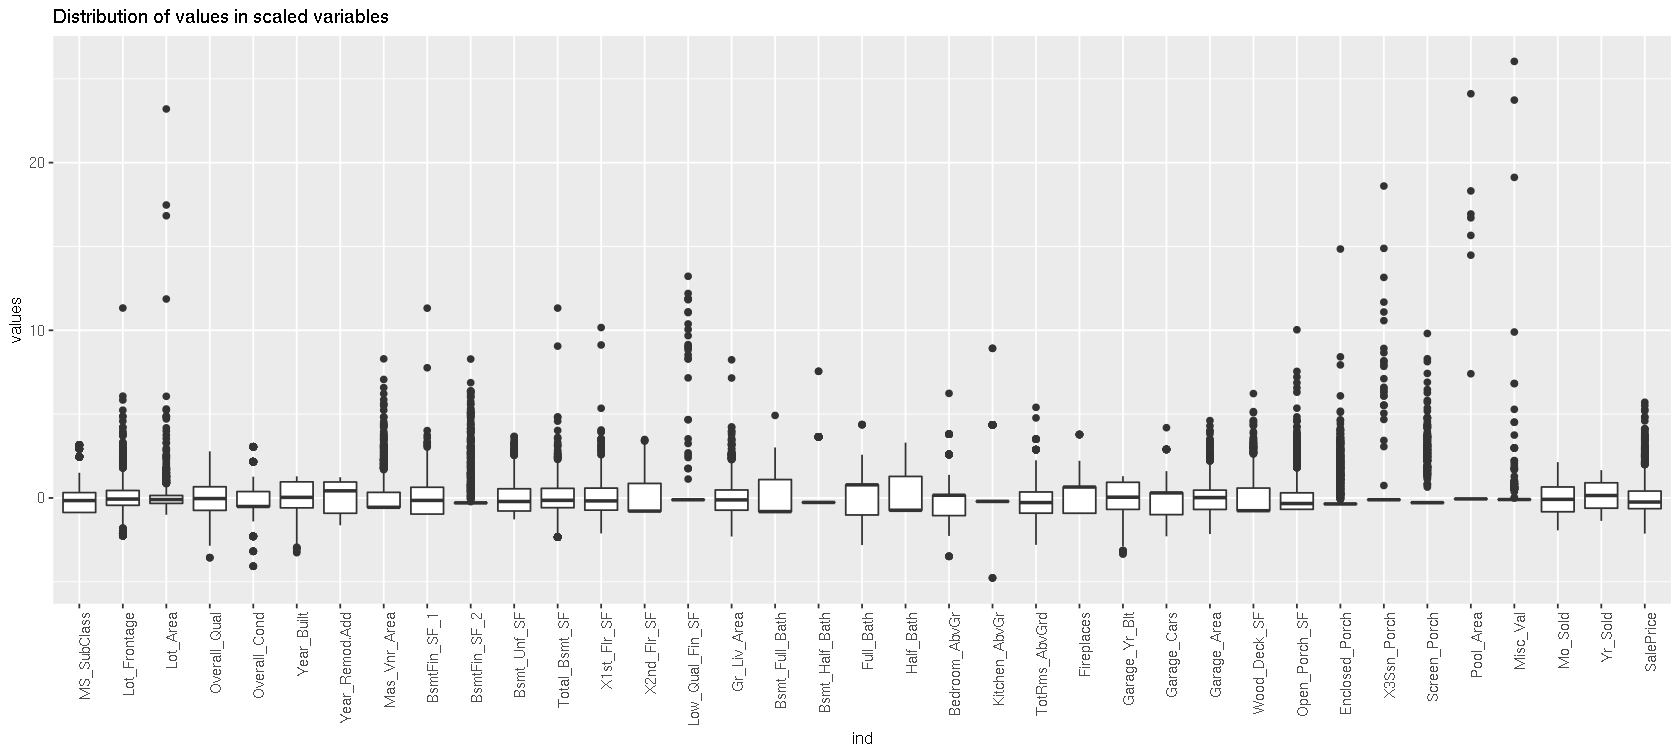

In [15]:
set_plot_dimensions(2, 0.9)
ggplot(stack(std.houses), aes(x = ind, y = values)) + 
  geom_boxplot() +
  ggtitle("Distribution of values in scaled variables") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))
cat('Number of vars: ', ncol(std.houses))

<p style="text-align:right"><b>
    After scaling variable distributions look much better.<br>
    Note that scaling method was captured as a pre-processing model.<br>
    Also note that some variables seem to have little IQR variance.<br>
    At this point we have data frame "std.houses" with:</b></p>
<table style="float:right">
    <tr><td>
        All variables numerical<br>
        No missing values<br>
        All variables centered and scaled<br>
    </td></tr>
</table>

## Robust PCA
<i>At this point our data may still suffer from outliers and variable dependencies. Normally such data is not suitable for centroid-based clustering. However, by using <b>PCA</b> we can transform data to eliminate variable dependencies and eliminate unimportant or noisy variables. We can also use <b>robust PCA</b> methods, which are capable of tolerating outliers. Subsequently we can cluster data using a <b>k-medoid</b> method which is partially robust (especially compared with k-means clustering. Note that some PCA methods cannot cope with variables of zero Inter-Quartile Range (IQR). In general such variables could consist mainly of noise and mey need to be eliminated.<br><br>
When using dummy variables we need to be careful as they could all be eliminated in the process! So this step may be optional.</i>

In [16]:
sel.train.houses <- std.houses

In [17]:
# Remove all columns with IQR=0, i.e. insufficient variance in IQR
# Note: IQR(x) = quantile(x, 3/4) - quantile(x, 1/4) (not Tukey's IQR)
cat('Variables with IQR = 0 (to be removed)\n')
sapply(subset(sel.train.houses, select=sapply(sel.train.houses, IQR)==0), IQR)
sel.train.houses <- subset(sel.train.houses, select=sapply(sel.train.houses, IQR)>0)
cat('Variables with IQR > 0 (to be retained)\n')
sapply(sel.train.houses, IQR)
cat('Number of vars: ', ncol(sel.train.houses))

Variables with IQR = 0 (to be removed)


BsmtFin_SF_2 Low_Qual_Fin_SF  Bsmt_Half_Bath   Kitchen_AbvGr  Enclosed_Porch 
              0               0               0               0               0 
    X3Ssn_Porch    Screen_Porch       Pool_Area        Misc_Val 
              0               0               0               0

Variables with IQR > 0 (to be retained)


MS_SubClass   Lot_Frontage       Lot_Area   Overall_Qual   Overall_Cond 
     1.1848693      0.8837316      0.4702115      1.4091836      0.8907386 
    Year_Built Year_Remod.Add   Mas_Vnr_Area   BsmtFin_SF_1    Bsmt_Unf_SF 
     1.5509114      1.8643133      0.8911148      1.5977458      1.3255977 
 Total_Bsmt_SF    X1st_Flr_SF    X2nd_Flr_SF    Gr_Liv_Area Bsmt_Full_Bath 
     1.1536283      1.3133763      1.6501829      1.2063123      1.9118448 
     Full_Bath      Half_Bath  Bedroom_AbvGr  TotRms_AbvGrd     Fireplaces 
     1.7962559      2.0177256      1.2150187      1.2621135      1.5649564 
 Garage_Yr_Blt    Garage_Cars    Garage_Area   Wood_Deck_SF  Open_Porch_SF 
     1.6166526      1.2963982      1.1516402      1.3487753      0.9852896 
       Mo_Sold        Yr_Sold      SalePrice 
     1.4792202      1.5134859      1.0492065

Number of vars:  28

In [18]:
# Create a robust PCA (with SVD and cov.rob)
robpca.model <- princomp(sel.train.houses, cor=FALSE, covmat= MASS::cov.rob(sel.train.houses))
cat("Loadings of the selected PCs:\n\n")
prmatrix(round(robpca.model$loadings[,1:9], 3))
cat("\nNumber of PCs: ", ncol(robpca.model$loadings))

Loadings of the selected PCs:

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
MS_SubClass     0.015  0.253  0.423  0.172  0.096  0.439  0.148  0.040  0.092
Lot_Frontage   -0.138 -0.125 -0.291 -0.232 -0.068 -0.357  0.026  0.006 -0.189
Lot_Area       -0.054 -0.040 -0.113 -0.108 -0.018 -0.124 -0.017 -0.017 -0.063
Overall_Qual   -0.300 -0.004  0.045  0.072  0.017  0.167 -0.005 -0.100  0.096
Overall_Cond    0.119 -0.019 -0.029 -0.151 -0.038  0.008 -0.272 -0.380  0.560
Year_Built     -0.260  0.004  0.164  0.255 -0.024 -0.193 -0.009  0.043 -0.100
Year_Remod.Add -0.255  0.025  0.143  0.253 -0.064 -0.194 -0.183 -0.170  0.333
Mas_Vnr_Area   -0.164 -0.046  0.040 -0.160  0.056  0.219  0.172  0.059 -0.024
BsmtFin_SF_1   -0.085 -0.310  0.321 -0.338 -0.004 -0.056  0.056  0.051  0.067
Bsmt_Unf_SF    -0.115  0.041 -0.479  0.371  0.022  0.216 -0.014 -0.001 -0.013
Total_Bsmt_SF  -0.196 -0.283 -0.135  0.007  0.015  0.150  0.042  0.051  0.051
X1st_Flr_SF    -0.213 -0.308 -0.1

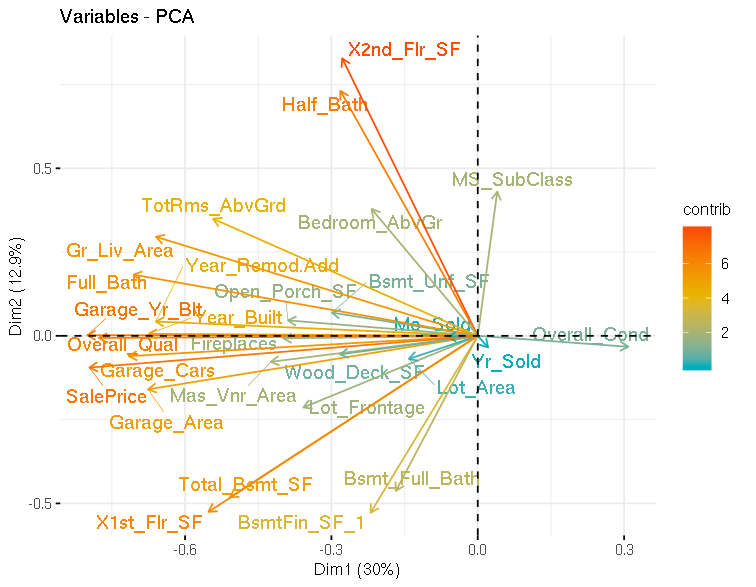

In [19]:
# Show the projection of original dimensions into principal components (loadings)
set_plot_dimensions(0.9, 0.7)
fviz_pca_var(robpca.model, col.var = "contrib", axes=c(1, 2),
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)

In [20]:
# Ensure you can "predict" scores
head(robpca.model$scores)
trans.train.houses <- data.frame(predict(robpca.model, newdata=sel.train.houses))
head(trans.train.houses)

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,⋯,Comp.19,Comp.20,Comp.21,Comp.22,Comp.23,Comp.24,Comp.25,Comp.26,Comp.27,Comp.28
528172075,-3.091530,1.1544617,-1.4581730,1.6960340,-0.7970610,-1.05331297,1.5538135,-0.1524985,0.14451327,0.24171414,⋯,-0.25814041,0.25287443,-0.16770994,-0.0363130985,-0.22178407,0.05839087,-0.01053888,-0.012867273,0.010496055,8.652959e-16
535450310,1.227666,0.7946950,-1.9985174,-1.2304777,-0.4825470,1.49634070,2.0453973,-0.7485920,0.43688310,0.32198589,⋯,-0.37218183,-0.71478590,-0.24907834,-0.1353489018,-0.18255258,-0.31135408,0.34383804,-0.009802383,-0.015647843,6.903398e-17
528431030,-2.431829,-0.7677017,-2.1033890,1.8461861,-0.7129459,0.49672410,1.0966428,-1.5807494,-0.06471399,0.15104257,⋯,-0.15448756,0.07850775,0.01600189,-0.0464888361,0.05335216,-0.12168289,0.15001613,0.017327687,-0.001678909,-1.404418e-17
534276040,2.735042,-1.0684436,0.1701916,0.5721145,0.2064481,-0.75189909,-1.2713297,1.1158556,-0.57911492,-0.03841271,⋯,-0.66681040,-1.15905223,0.20818485,-0.0007194795,-0.01239791,-0.07053182,0.13954158,1.194163572,0.002969251,5.947984e-15
527380240,-4.567750,1.2780696,1.1209922,-2.5444930,-0.2499550,-0.05198449,0.3104256,0.3084029,0.30104001,0.64204095,⋯,0.08858278,0.01129736,-0.01438569,0.3089784602,0.20596120,0.06105767,0.11857228,0.017770676,-0.010936743,5.237988e-16
907187030,-1.389649,2.6016942,-0.2590274,1.1449263,-0.1404971,-0.71889442,-0.4746761,0.3407255,0.14533197,-0.20349929,⋯,0.04887889,-0.22011507,0.59211524,0.0627850740,-0.11162527,0.02253470,0.16562278,-0.004443048,0.001999523,-3.647389e-18


,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,⋯,Comp.19,Comp.20,Comp.21,Comp.22,Comp.23,Comp.24,Comp.25,Comp.26,Comp.27,Comp.28
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
528172075,-3.091530,1.1544617,-1.4581730,1.6960340,-0.7970610,-1.05331297,1.5538135,-0.1524985,0.14451327,0.24171414,⋯,-0.25814041,0.25287443,-0.16770994,-0.0363130985,-0.22178407,0.05839087,-0.01053888,-0.012867273,0.010496055,8.652959e-16
535450310,1.227666,0.7946950,-1.9985174,-1.2304777,-0.4825470,1.49634070,2.0453973,-0.7485920,0.43688310,0.32198589,⋯,-0.37218183,-0.71478590,-0.24907834,-0.1353489018,-0.18255258,-0.31135408,0.34383804,-0.009802383,-0.015647843,6.903398e-17
528431030,-2.431829,-0.7677017,-2.1033890,1.8461861,-0.7129459,0.49672410,1.0966428,-1.5807494,-0.06471399,0.15104257,⋯,-0.15448756,0.07850775,0.01600189,-0.0464888361,0.05335216,-0.12168289,0.15001613,0.017327687,-0.001678909,-1.404418e-17
534276040,2.735042,-1.0684436,0.1701916,0.5721145,0.2064481,-0.75189909,-1.2713297,1.1158556,-0.57911492,-0.03841271,⋯,-0.66681040,-1.15905223,0.20818485,-0.0007194795,-0.01239791,-0.07053182,0.13954158,1.194163572,0.002969251,5.947984e-15
527380240,-4.567750,1.2780696,1.1209922,-2.5444930,-0.2499550,-0.05198449,0.3104256,0.3084029,0.30104001,0.64204095,⋯,0.08858278,0.01129736,-0.01438569,0.3089784602,0.20596120,0.06105767,0.11857228,0.017770676,-0.010936743,5.237988e-16
907187030,-1.389649,2.6016942,-0.2590274,1.1449263,-0.1404971,-0.71889442,-0.4746761,0.3407255,0.14533197,-0.20349929,⋯,0.04887889,-0.22011507,0.59211524,0.0627850740,-0.11162527,0.02253470,0.16562278,-0.004443048,0.001999523,-3.647389e-18


<p style="text-align:right"><b>
    Make sure you can "predict" scores.<br>
    Many versions of robust PCS do not directly support for clustering of new data.<br>
    If you cannot reliably cluster new data, the PCA method is useless.<br>
    Note that the PCA model is available for saving and future "prediction".
 </b></p>

### Selection of the optimum number of principal components
<i>PCA is often used for dimensionality reduction. One way of selecting the best number of PCs is using a "scree plot" and an "elbow method". The basic concept of an "elbow method" is identify such number of principal components, beyond which addition of more components does not significantly explain the overall variance in data. This is commonly seen as an "elbow-like" bent in the chart. In many cases, the method is imprecise and subjectives, and yet increadibly popular.</i>

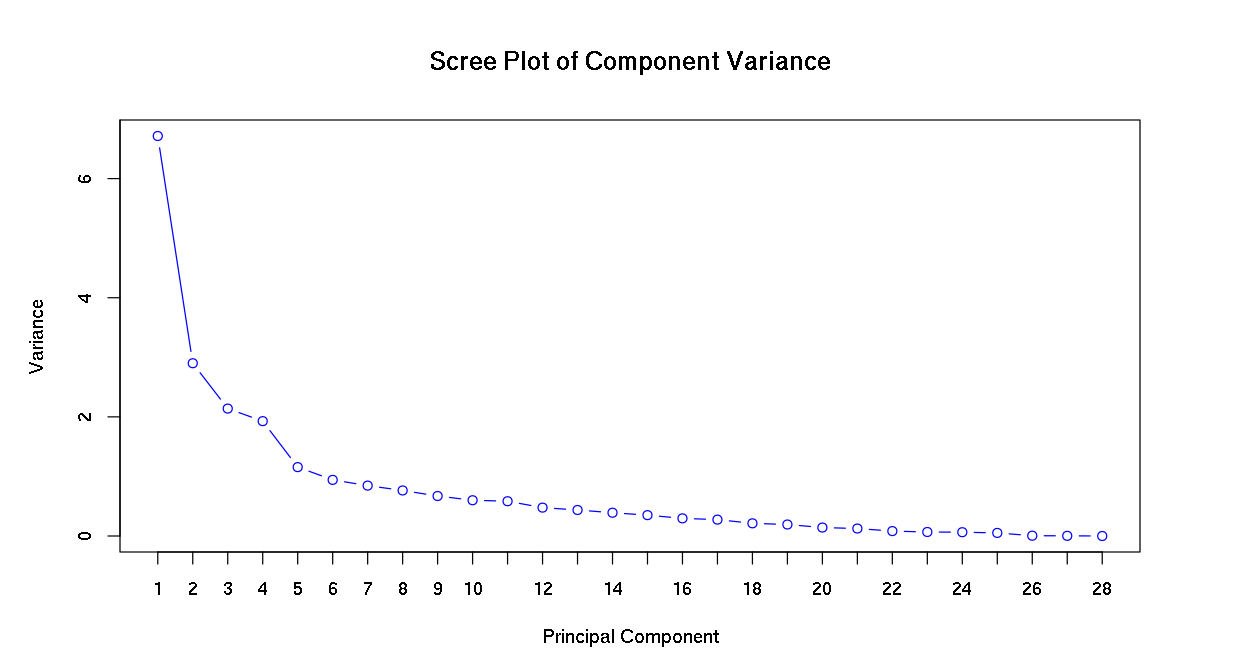

In [21]:
# Scree plot of eigenvalues
plot.eigenv <- function(rpca) {
    pc.var = rpca$sdev^2
    pc.nos = seq(1:length(pc.var))
    plot(x = pc.nos, y = pc.var, type = "b", axes=FALSE,
        main = "Scree Plot of Component Variance", col="blue",
        xlab = "Principal Component", ylab = "Variance")
    axis(side=1, at=pc.nos)
    axis(side=2, at=seq(0, 10, by=2))
    box()
}
set_plot_dimensions(1.5, 0.8, margin=c(5,5,5,5))
plot.eigenv(robpca.model)

<p style="text-align:right"><b>
    We can see a few "elbows" here, e.g. at PC=2, PC=6 and PC=12!
 </b></p>

<i>A more objective method is to look at the cumulative variance of principal components</i>

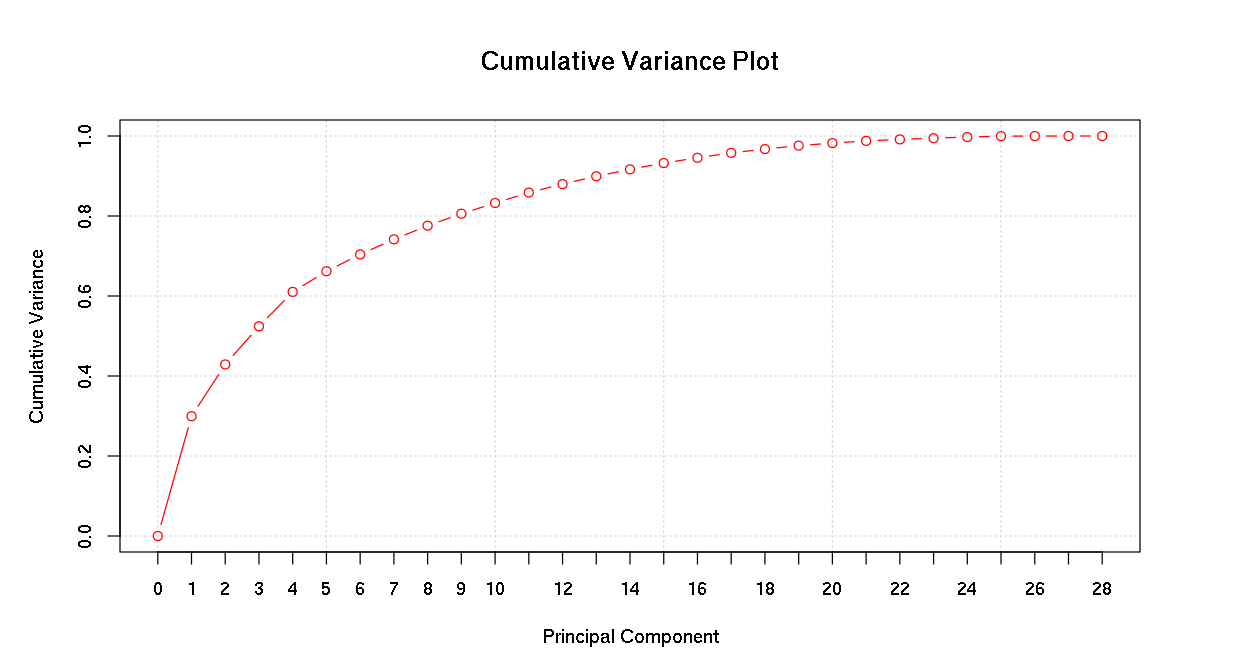

In [22]:
# Cumulative variance plot (eigenvalues)
plot.cumvar <- function(rpca) {
    pc.var = append(0, rpca$sdev^2 / sum(rpca$sdev^2))
    pc.nos = seq(0, length(pc.var)-1)
    plot(x=pc.nos, y=cumsum(pc.var), type="b", col="red", axes=FALSE,
       xlab="Principal Component", ylab="Cumulative Variance", 
       main="Cumulative Variance Plot", panel.first=grid(), 
       xlim = c(0, length(pc.var)-1), ylim = c(0, 1))
    axis(side=1, at=pc.nos)
    axis(side=2, at=seq(0, 1, by=0.2))
    box()
}

set_plot_dimensions(1.5, 0.8, margin=c(5,5,5,5))
plot.cumvar(robpca.model)

 <p style="text-align:right"><b>
    The plot displays the cumulative variance of all PCs.<br>
    It indicates that the first two PCs explain over 40% variance - this is what interests us!<br>
    It also shows that the first 10 PCs explain over 80% of variance.<br>
    However, in our case we have no problems with too many dimensions and we'l keep all PCs.
 </b></p>

<b><i><span style="color:red">At this point we should do the following:</span><br></i></b>(1) reduce the number of principal componments;<br>(2) remove outliers using one of the global outlier detection methods.<b><i><br>For brevity of this demo, we will opt not to do so.</i></b>

## Cluster Preparation and Measurements
<i>One issue in the development of centroid and medoid based clustering system is the selection of the most suitable cluster numbers (the value of k). Typically we construct many different cluster systems and select the one which offers the best performance. There are several difficulties in doing so:<br>
    <ul><li>Construction of each clustering can be very resource expensive
        <li>Measurement of cluster performance may be difficult
        <li>Selection of optimum cluster architecture may be impossible or be subjective
    </ul>
To overcome the first difficulty we often perform the clustering tests on a smaller sample of the available data. To deal with measurement difficulties and the selection of an optimum cluster configuration we commonly rely on several different metrics to decide on the "best" cluster number.
</i>

### Selection using silhouette widths
<i><b>Silhouette width</b> signifies the distance of a data point from the cluster "center", with 1 (one) signifying the point at the centre, and 0 (zero) signifying the point between two closest clusters. Negative width indicates that an observation should actually be a member of another cluster. The average cluster width indicates the quality of each cluster. The average width of all clusters represents the quality of the clustering system, with 1 being the best and -1 the worst. When we plot all data points widths, we generate a "silhouette" of the clustering system. 

We select the number of clusters which generates the maximum average silhouette cluster width. This may be either too small or too large for the task, in which case we test a number of local maxima.</i>

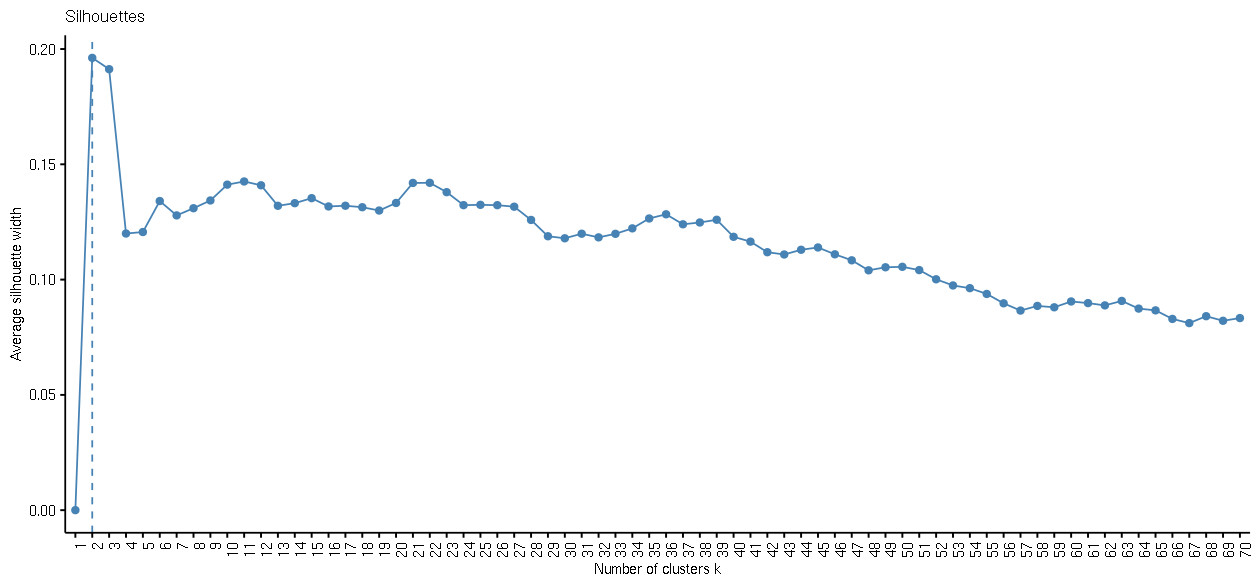

In [23]:
# Try different methods: "gap_stat", "wss", "silhouette"
set.seed(2019)
small.train.size <- 100
small.train.idx <- sample(seq_len(nrow(trans.train.houses)), size = small.train.size)

# Investigate silhouette measurements (explained further)
set_plot_dimensions(1.5, 0.7)
sel.subset <- trans.train.houses[small.train.idx,]
fviz_nbclust(sel.subset, FUNcluster=cluster::pam, method = "silhouette",  k.max = 70) +
  ggtitle("Silhouettes") +
  theme(text = element_text(size=9), axis.text.x = element_text(angle = 90, hjust = 1))

<p style="text-align:right"><b>
    We can see a few local maxima, e.g. k=2, k=6, k=11, k=21, etc.
 </b></p>

### Selection using the gap statistic
<i><b>Gap statistic</b> compares the total within intra-cluster variance for different values of k, of the cluster sets produced with the selected method vs a random distribution of data into k groups using samples of the original data. The objective is to maximise the difference between the cluster allocation and a random allocation. However, we select the first k where the next k+1 cluster partition improves clustering only within an error range (1 standard deviation). This number of clusters may not be optimal in practice, in which case we'd test a range of local maxima.</i>

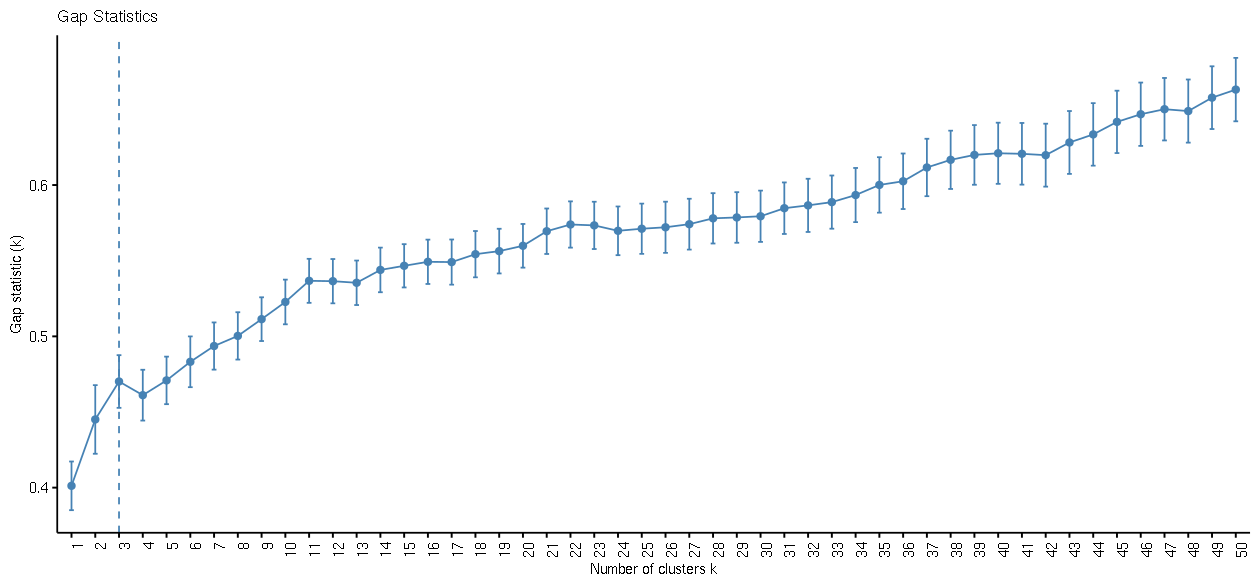

In [24]:
# Investigate silhouette measurements (explained further)
set_plot_dimensions(1.5, 0.7)
sel.subset <- trans.train.houses[small.train.idx,]
fviz_nbclust(sel.subset, FUNcluster=cluster::pam, method = "gap_stat",  k.max = 50) +
  ggtitle("Gap Statistics") +
  theme(text = element_text(size=9), axis.text.x = element_text(angle = 90, hjust = 1))

<p style="text-align:right"><b>
    We can see a few local maxima, e.g. at k=3, k=11, k=22, etc.
 </b></p>

### Selection using the informal "elbow method"
<i>The basic concept of an "elbow method" is identify such cluster number k, beyond which increasing the complexity of data clustering does not result in a significant gain in cluster quality. It is common to represent the cluster complexity by the number of clusters. The cluster quality is often exemplified by the average distance to the cluster center (within sum of squares of distances to the centeroid or medoid). In many cases, the method is imprecise and subjectives, and yet increadibly popular.</i>

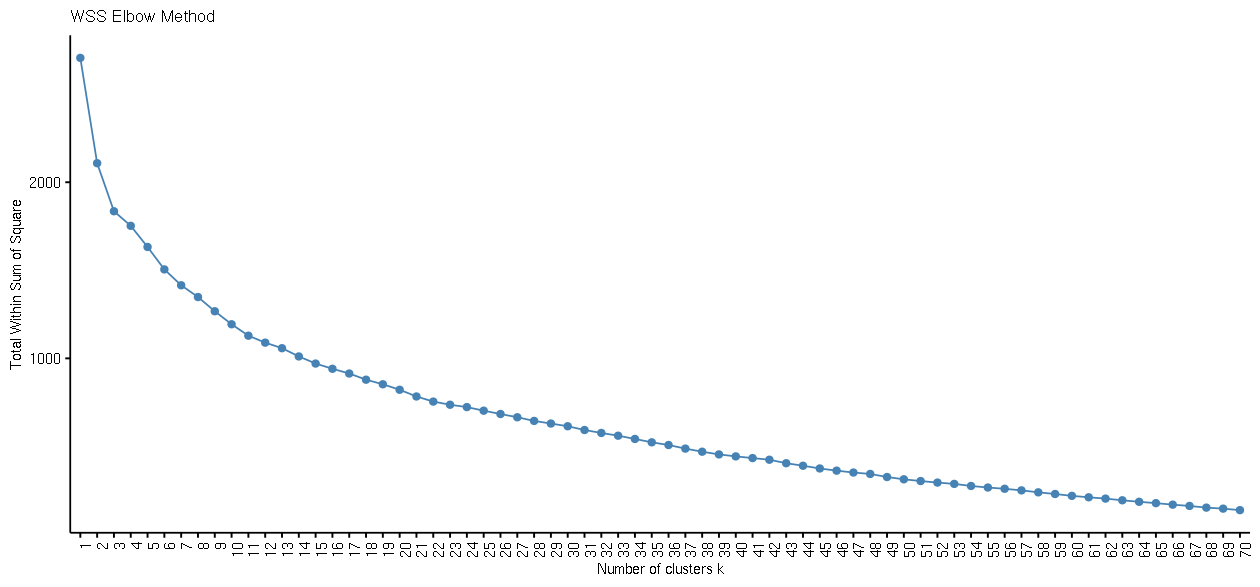

In [25]:
# Investigate the optimum using the "elbow method"
set_plot_dimensions(1.5, 0.7)
sel.subset <- trans.train.houses[small.train.idx,]
fviz_nbclust(sel.subset, FUNcluster=cluster::pam, method = "wss",  k.max = 70) +
  ggtitle("WSS Elbow Method") +
  theme(text = element_text(size=9), axis.text.x = element_text(angle = 90, hjust = 1))

<p style="text-align:right"><b>
    We can see (very unclearly) a few "elbows" here, e.g. at k=3, k=11, k=21, k=39, etc.<br>
    We rely on the "elbow" method as the last resort!
 </b></p>

<p style="text-align:right"><b>
    We will rely on the combination of measurements to decide the optimum number of clusters.<br>
</b></p>

### Creation of medoid clusters

<i>We will use the <b>PAM (Partitioning Around Medoids)</b> method. PAM k-Medoid clustering identifies k data points, called medoids, which define clusters and their members. The algorithm is iterative minimising the sum of dissimilarities between cluster members vs their cluster medoid using an objective function. The global optimisation may cause some cluster members to be outside their respective cluster boundaries.</i>

In [26]:
# k-medoid settings
kNo <- 6 # Try: 2, 6 and 11 and 21
std <- FALSE

# Create a cluster model
cluster.model <- pam(x=trans.train.houses, k=kNo, stand = std)
data.frame(clus_no=1:kNo, cluster.model$clusinfo, avg_sil_width=cluster.model$silinfo$clus.avg.widths)

clus_no,size,max_diss,av_diss,diameter,separation,avg_sil_width
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,178,8.800046,3.789673,12.70010,1.5860911,0.24367163
2,522,8.966522,4.282708,12.42782,1.5481330,0.06502796
3,171,23.776414,5.186507,26.84481,1.7923069,0.06195857
4,421,11.004007,4.291561,15.08035,1.9005660,0.11575459
5,342,23.930764,4.786334,26.15583,0.9975811,0.01866839
6,366,7.377168,4.097833,11.67133,0.9975811,0.10863328


<p style="text-align:right"><b>
    Note that PAM model is available for storage and application to new data.<br>
    PAM determines cluster quality based on:
 </b></p>
 
 <table style="float:right">
    <tr><td>
        distance betweeen points<br>
        cluster diameter<br>
        cluster member separation, and<br>
        average <b><i>silhouette width</i></b>
    </td></tr>
</table>

In [27]:
# Cluster statistics for individual data points
sil.widths <- cluster.model$silinfo$widths
head(sil.widths[order(as.numeric(row.names(sil.widths))),], 6)
print(paste("Sizes: silhouettes = ", length(cluster.model$silinfo$widths),
        "; clustered set = ", length(cluster.model$clustering),
        "; original data set = ", nrow(sel.train.houses)))
print(paste("Average cluster silhouette width: ", round(cluster.model$silinfo$avg.width, 2)))

,cluster,neighbor,sil_width
526301100,5,6,0.03097514
526302030,6,2,0.11083431
526302120,5,1,0.04137056
526303060,5,6,0.05798644
526350040,2,6,-0.04184079
526351010,6,2,0.05958988


[1] "Sizes: silhouettes =  6000 ; clustered set =  2000 ; original data set =  2000"
[1] "Average cluster silhouette width:  0.09"


<p style="text-align:right"><b>
    Shows the cluster of each observation, the closest cluster neighbor and the observation silhouette width.<br>
    Note observation </b><i>526350040</i><b> in cluster 2 is closer to the medoid of cluster 6 than its own.
 </b></p>

In [28]:
# Enter cluster details into the standardised data in PCA coordinates
dataClusters <- cluster.model$clustering
clusteredDataset <- data.frame(cluster=dataClusters, trans.train.houses)
head(clusteredDataset)

,cluster,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,⋯,Comp.19,Comp.20,Comp.21,Comp.22,Comp.23,Comp.24,Comp.25,Comp.26,Comp.27,Comp.28
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
528172075,1,-3.091530,1.1544617,-1.4581730,1.6960340,-0.7970610,-1.05331297,1.5538135,-0.1524985,0.14451327,⋯,-0.25814041,0.25287443,-0.16770994,-0.0363130985,-0.22178407,0.05839087,-0.01053888,-0.012867273,0.010496055,8.652959e-16
535450310,2,1.227666,0.7946950,-1.9985174,-1.2304777,-0.4825470,1.49634070,2.0453973,-0.7485920,0.43688310,⋯,-0.37218183,-0.71478590,-0.24907834,-0.1353489018,-0.18255258,-0.31135408,0.34383804,-0.009802383,-0.015647843,6.903398e-17
528431030,1,-2.431829,-0.7677017,-2.1033890,1.8461861,-0.7129459,0.49672410,1.0966428,-1.5807494,-0.06471399,⋯,-0.15448756,0.07850775,0.01600189,-0.0464888361,0.05335216,-0.12168289,0.15001613,0.017327687,-0.001678909,-1.404418e-17
534276040,2,2.735042,-1.0684436,0.1701916,0.5721145,0.2064481,-0.75189909,-1.2713297,1.1158556,-0.57911492,⋯,-0.66681040,-1.15905223,0.20818485,-0.0007194795,-0.01239791,-0.07053182,0.13954158,1.194163572,0.002969251,5.947984e-15
527380240,3,-4.567750,1.2780696,1.1209922,-2.5444930,-0.2499550,-0.05198449,0.3104256,0.3084029,0.30104001,⋯,0.08858278,0.01129736,-0.01438569,0.3089784602,0.20596120,0.06105767,0.11857228,0.017770676,-0.010936743,5.237988e-16
907187030,4,-1.389649,2.6016942,-0.2590274,1.1449263,-0.1404971,-0.71889442,-0.4746761,0.3407255,0.14533197,⋯,0.04887889,-0.22011507,0.59211524,0.0627850740,-0.11162527,0.02253470,0.16562278,-0.004443048,0.001999523,-3.647389e-18


<p style="text-align:right"><b>
    All observations are now uniquely allocated to their cluster.<br>
    Note that standardised units make it difficult for analysts to interpret clusters directly!
 </b></p>

### Cluster Diagnostics
<i>It is important that before a cluster system is used, it is first investigated using cluster diagnostics. It is unfortunate that in many machine learning textbooks cluster diagnostics are used for cluster interpretation.</i>

 <p style="text-align:right"><b>
    The following plots shows the projection of the original vars into principal components.<br>
    The first plot indicates the contribution of the original vars to PC1 and PC2.
 </b></p>

Warning message:
“Removed 51 rows containing non-finite values (stat_ellipse).”
Warning message:
“Removed 51 rows containing missing values (geom_point).”


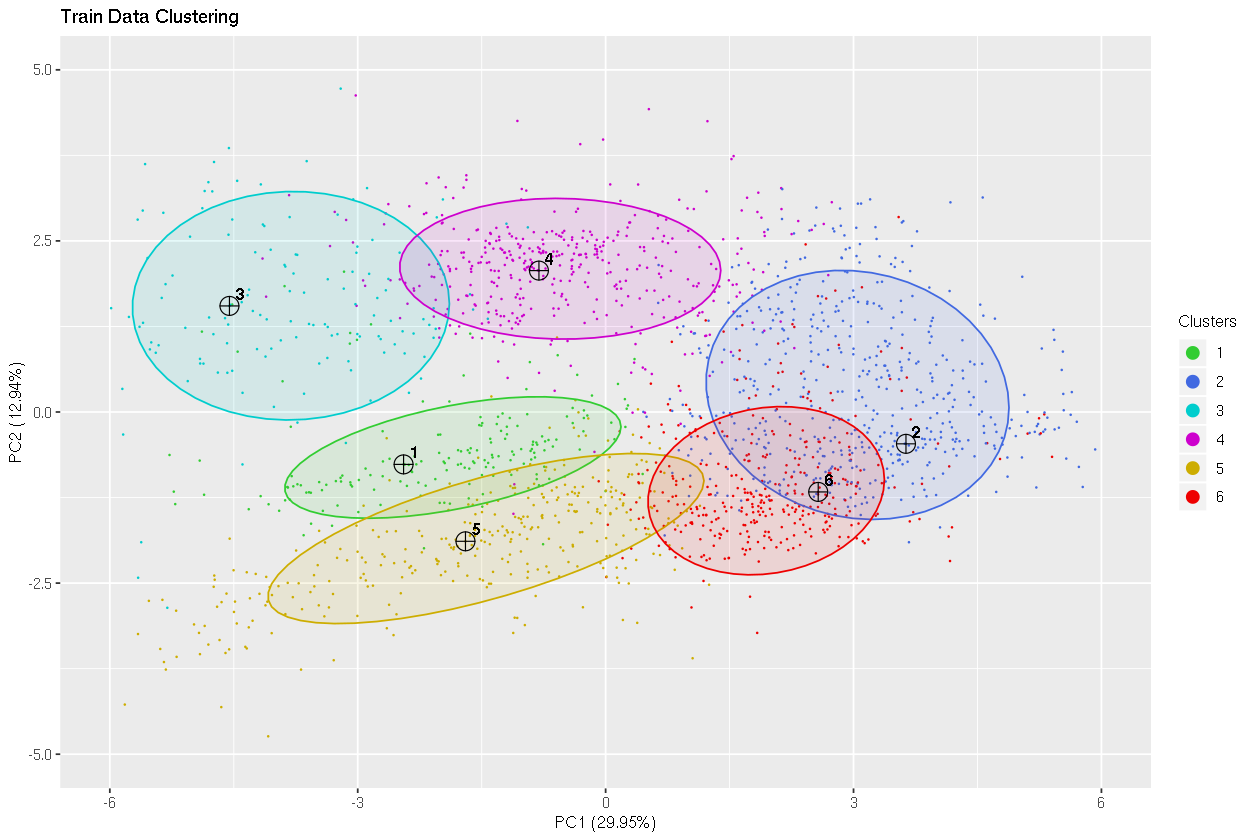

In [29]:
# Plot PC1 x PC2
sel.cols=c("limegreen", "royalblue", "cyan3", "magenta3", "gold3", "red2")
set_plot_dimensions(1.5, 1)
plot.clus.rpca(robpca.model, cluster.model, data=trans.train.houses, cluster=dataClusters,
    title="Train Data Clustering", col=sel.cols, alpha=0.1, comp1=1, comp2=2, xlim=c(-6, 6), ylim=c(-5, 5))

 <p style="text-align:right"><b>
    Note that cluster centers are medoids but the circles are around means.<br>
    Also observe that cluster 3 seems well separated from the rest.<br>
    Pairs of clusters 2 and 3, 3 and 5, etc. are non-interesecting.<br> 
    However clusters 2 and 6 seem to be most overlapping.<br>
    Clusters 2 and 4 are very close - possibly a problem?<br>
    Clusters 1 and 5 have a bit of overlap.
 </b></p>

Warning message:
“Removed 49 rows containing non-finite values (stat_ellipse).”
Warning message:
“Removed 49 rows containing missing values (geom_point).”


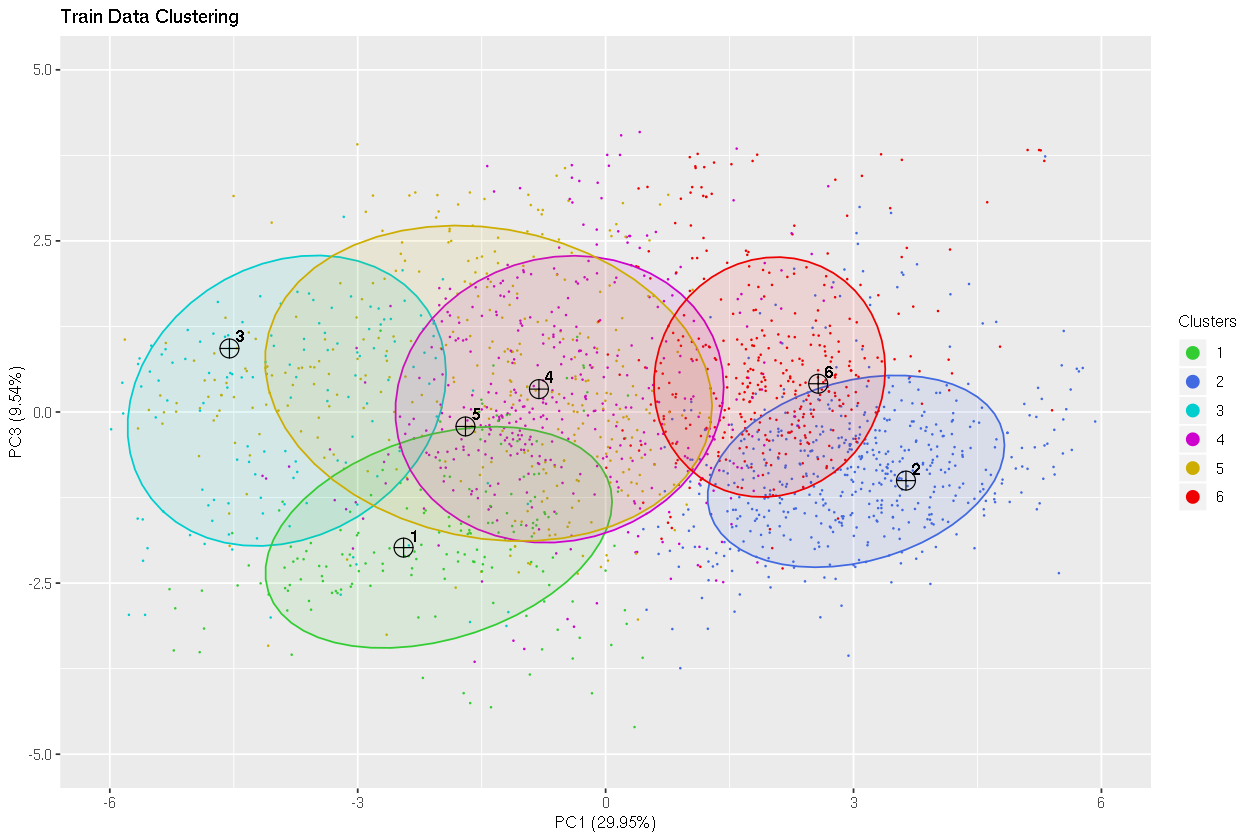

In [30]:
# Plot PC1 and PC3
sel.cols=c("limegreen", "royalblue", "cyan3", "magenta3", "gold3", "red2")
set_plot_dimensions(1.5, 1)
plot.clus.rpca(robpca.model, cluster.model, data=trans.train.houses, cluster=dataClusters,
    title="Train Data Clustering", col=sel.cols, alpha=0.1, comp1=1, comp2=3, xlim=c(-6, 6), ylim=c(-5, 5))

<p style="text-align:right"><b>
    In this view clusters 2 and 4 are still close.<br>
    The "overlap" of 4 and 5 is just due to this perspectrive.
 </b></p>

<p style="text-align:right"><b>
    Further dimensions may need to be explored.<br>
    However this visualisation is not the most effective for cluster diagnostics!<br>
    A better option is to explore cluster silhouettes.
 </b></p>

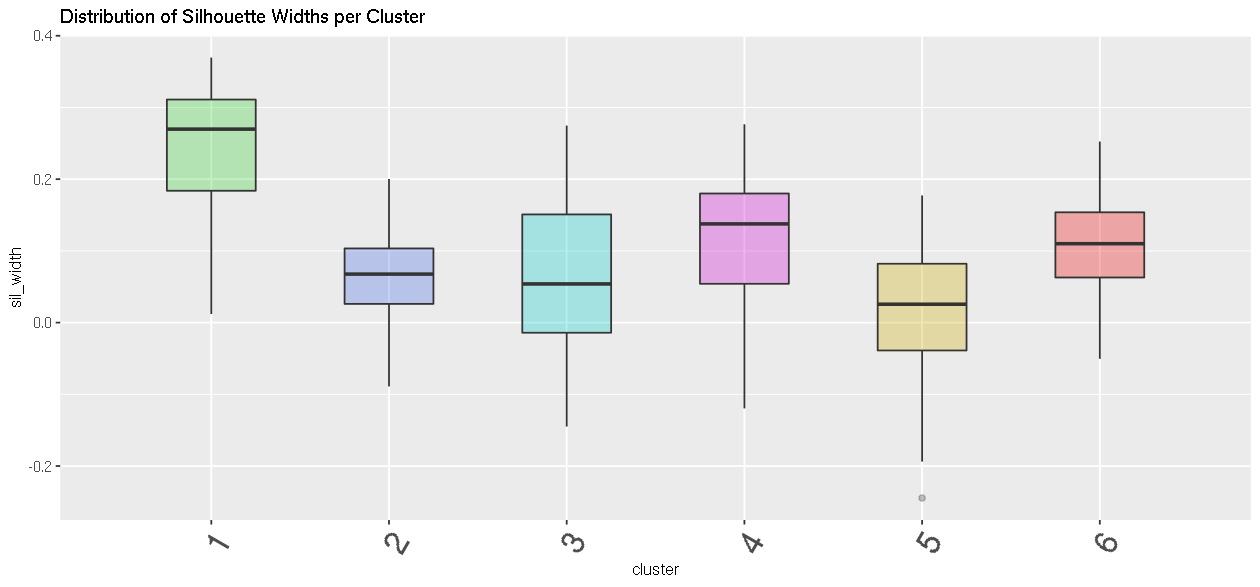

In [31]:
# Distribution of silhouete widths within clusters
set_plot_dimensions(1.5, 0.7)
cols <- colorRampPalette(c("limegreen", "royalblue", "cyan3", "magenta3", "gold3", "red2"))(kNo)
ggplot(data.frame(cluster.model$silinfo$widths), aes(group = cluster, x = cluster, y = sil_width)) + 
  geom_boxplot(width=0.5, fill=cols, alpha=0.3) +
  ggtitle("Distribution of Silhouette Widths per Cluster") +
  scale_x_discrete(limits=1:kNo) +
  theme(axis.text.x = element_text(angle = 60, hjust = 1, size=18))

<p style="text-align:right"><b>
    Interestingly clusters 3 and 5 seem have the lowest silhouette width.<br>
    Cluster 1 seems to be very well separated from the rest,<br>
    which was not so obvious from the previous charts.<br>
    It means some of their members are closer to other clusters than their own.
 </b></p>

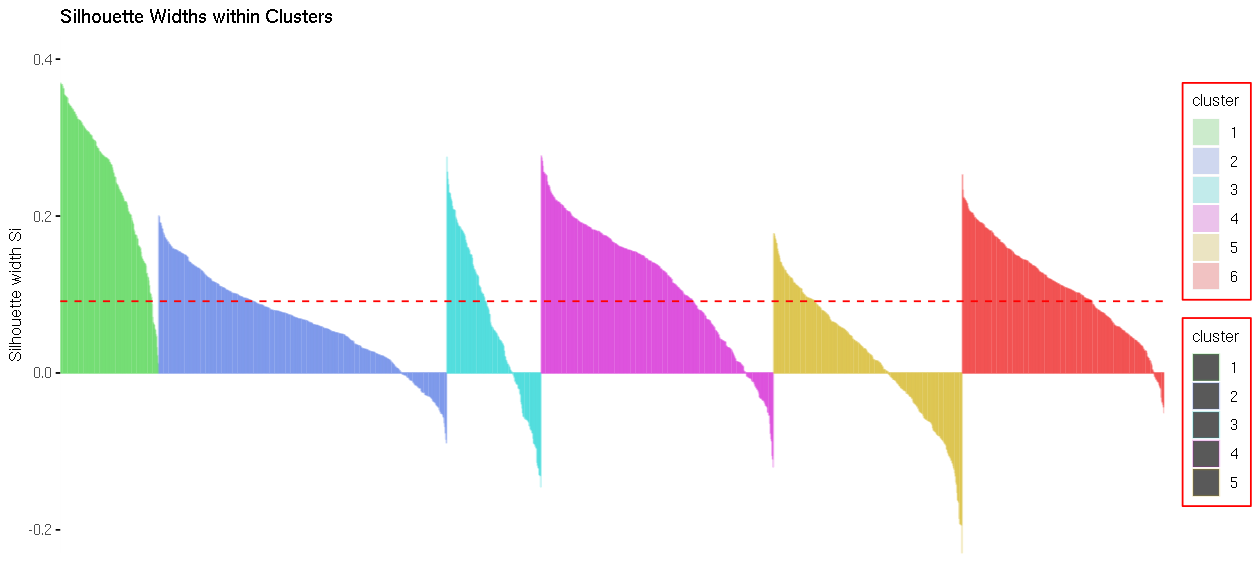

In [32]:
# Silhouete chart of data point widths within clusters
set_plot_dimensions(1.5, 0.7)
colsRamp <- colorRampPalette(c("limegreen", "royalblue", "cyan3", "magenta3", "gold3", "red2"))(kNo)
colsAlpha <- function(..., n, alpha) {
   colors <- colorRampPalette(...)(n)
   paste(colors, sprintf("%x", ceiling(255*alpha)), sep="")
}
cols <- colsAlpha(colsRamp, n=kNo, alpha=0.2)

fviz_silhouette(cluster.model, print.summary = FALSE, ylim=c(-0.2, 0.4)) +
    scale_color_manual(breaks = c("1", "2", "3", "4", "5"), values=cols) +
    scale_fill_manual(values=cols) +
    theme(legend.background = element_rect(color = "red", linetype = "solid")) +
    ggtitle("Silhouette Widths within Clusters")

<p style="text-align:right"><b>
    This is best demonstrated in the silhouette plot.<br>
    It shows that many members of clusters 3 and 5 do not belong there!<br>
    However, it seems clusters 1 and 6 are very clean.
 </b></p>

### Adding cluster information back to the original data

<p style="text-align:right"><b>
    Note that cluster medoids can now tell a "story".<br>
    These stories are only as accurate as the cluster cohesion and separation.<br>
    However, it is difficult to interpret variable values in PCs.<br>
    We have also "lost" some of the multi-collinear variables.<br>
    Can we bring them back?
 </b></p>

In [33]:
# Adding cluster column to the original data
clus.train.houses <- merge(data.frame(cluster.model$clustering), train.houses, by=0, all=FALSE)
colnames(clus.train.houses)[2] <- "Cluster"
rownames(clus.train.houses) <- clus.train.houses$Row.names
clus.train.houses$Cluster <- as.factor(clus.train.houses$Cluster)
clus.train.houses <- subset(clus.train.houses, select=-c(Row.names))
head(clus.train.houses)
cat("Number of clustered observations: ", nrow(clus.train.houses))

,Cluster,MS_SubClass,Lot_Frontage,Lot_Area,Overall_Qual,Overall_Cond,Year_Built,Year_Remod.Add,Mas_Vnr_Area,BsmtFin_SF_1,⋯,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,X3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,SalePrice
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1007100110,2,70,68,56600,5,1,1900,1950,0,0,⋯,0,0,0,0,0,0,0,1,2008,103000
526301100,5,20,141,31770,6,5,1960,1960,112,639,⋯,210,62,0,0,0,0,0,5,2010,215000
526302030,6,20,68,11027,6,5,1954,1954,28,468,⋯,280,0,0,0,0,0,0,5,2006,149900
526302120,5,20,68,11765,5,5,1957,1957,302,1127,⋯,0,0,0,0,0,0,0,6,2006,169000
526303060,5,20,68,39384,6,6,1957,1957,902,1110,⋯,0,189,0,0,0,0,0,10,2006,252000
526350040,2,20,80,11622,5,6,1961,1961,0,468,⋯,140,0,0,0,120,0,0,6,2010,105000


Number of clustered observations:  2000

In [34]:
# Retrieving the medoid original observations
clus.train.medoid.ids <- row.names(cluster.model$medoids)
cat(clus.train.medoid.ids)
clus.train.medoids <- clus.train.houses[row.names(clus.train.houses) %in% clus.train.medoid.ids,]
clus.train.medoids <- subset(clus.train.medoids, 
     select=c(Cluster, Lot_Frontage, Lot_Area, Overall_Qual,
              Bedroom_AbvGr, Garage_Area, Year_Built, 
              Yr_Sold, SalePrice))
clus.train.medoids <- clus.train.medoids[with(clus.train.medoids, order(Cluster)),]
clus.train.medoids

906382060 902205090 528142140 531450170 907275090 907200110

,Cluster,Lot_Frontage,Lot_Area,Overall_Qual,Bedroom_AbvGr,Garage_Area,Year_Built,Yr_Sold,SalePrice
,<fct>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
906382060,1,73,8760,8,3,674,2006,2007,212999
902205090,2,50,6000,5,3,288,1957,2008,112500
528142140,3,85,10574,8,4,756,2004,2008,316000
531450170,4,76,9291,6,3,506,1993,2008,187000
907275090,5,73,11883,7,3,478,1996,2009,203000
907200110,6,68,9200,5,3,308,1975,2008,130250


In [35]:
# Find cluster frequency
clus.aggr.freq <- aggregate(subset(clus.train.houses, select=c(Cluster)), 
                               by=list(clus.train.houses$Cluster), length)
clus.aggr.freq

Group.1,Cluster
<fct>,<int>
1,178
2,522
3,171
4,421
5,342
6,366


## Segmentation Analysis / Cluster Interpretation

<p style="text-align:right"><b>
    We have now recovered the original data corrdinates and units.<br>
    We have also brough back some of the "lost" variables.<br>
    We are now ready for segmentation analysis!
 </b></p>

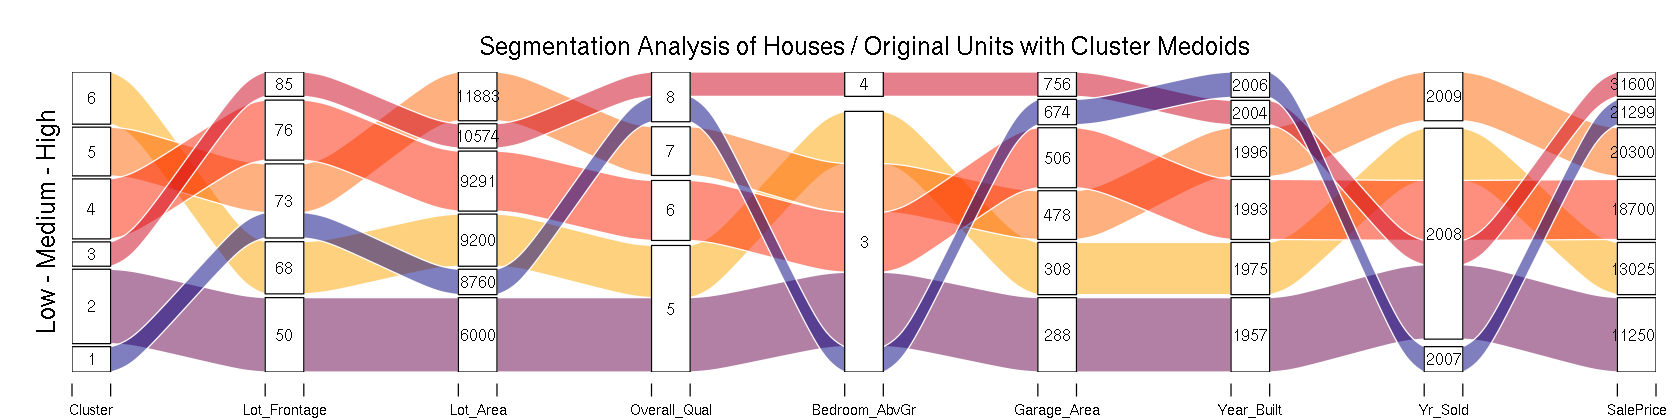

In [36]:
# Plotting cluster information in the original units - using cluster medoids
colfunc <- colorRampPalette(c("navy", "red", "orange"))
cols <- colfunc(kNo)
set_plot_dimensions(2, 0.5, c(2, 7, 7, 2))
par(oma=c(0,2,2,0))
alluvial(clus.train.medoids, freq=clus.aggr.freq$Cluster, col=cols, cex=0.8, cex.axis = 0.7)
mtext("Segmentation Analysis of Houses / Original Units with Cluster Medoids", line = 6.5, side=3, cex=1.2)
mtext("Low - Medium - High", line = 6.5, side=2, cex=1.2)

<p style="text-align:right"><b>
    <span style="color:red">Challenge:</span><br>
    Can you now describe each cluster?<br>
    Is it possible to say which of those descriptions can be trusted?<br>
    Would it be safe to remove some of the less reliable clusters out?<br>
    If so, under what conditions?
</b></p>

<p style="text-align:right"><b>
    Note that k-medians will break data differently!<br>
    We should not mix medians and medoids in a single analysis!<br>
    medoids $\neq$ medians!
</b></p> 

### Now save all models for further testing and deployment

The following models have been created in the process of cluster and segmentation analysis:
<ul>
    <li>impute.model - to deal with missing values</li>
    <li>std.model - to normalise data</li>
    <li>cluster.model - to cluster data</li>
    <li>pca.model - to display data within clusters</li>
</ul>

Note that all preprocessing models can be saved to and retrieved from
disk using <b>saveRDS</b> and <b>readRDS</b> serialisation functions.

In [37]:
saveRDS(impute.model, "Models/rimpute_model.rds")
saveRDS(std.model, "Models/rstd_model.rds")
saveRDS(robpca.model, "Models/rpca_model.rds")
saveRDS(cluster.model, "Models/rcluster_model.rds")

## Final remarks and a bit of warnings
<i>Not all is so rosy! What have we missed?
<ul>
    <li>Due to robust methods we have not eliminated <b>outliers</b>,<br>
        however, outliers may need to be detected and eliminated in deployment.</li>
    <li>We have not investigate data <b>skeweness</b> or <b>sparsity</b>, which affect PCA.<br>
        we could have used <b>RosPCA</b> library which better deals with these issues,</li>
    <li>We could have opted for variable clustering rather than PCA,<br>
        R package <b>ClustOfVar</b> ensures generation of homogenous variable groups.</li>
    <li>We should still test different k for PAM clustering and decide which is best.</li>
    <li>Other measurements of cluster quality available in R that are worth-exploring,<br>
        such as <b>Rand index</b>, <b>Davis-Bouldin index</b> or <b>Cubic Clustering Criterion (CCC).</b></li>
    <li><b><span style="color:red">Finally, we should test deployment of clustering on independent data - this is next!</span></b></li>
</ul>
</i>

### Additional notes for those mathematically-oriented

<i><b>Silhouette width</b> is calculated for all data points 'i' as follows:

<table align="left">
    <tr><td>
        $s(i)=\left\{\begin{matrix}
1-\frac{a(i)}{b(i)} & : & a(i)<b(i)\\ 
0 & : & a(i)=b(i)\\ 
\frac{b(i)}{a(i)}-1 & : & a(i)>b(i)
\end{matrix}\right.$
    </td><td style="text-align:left; vertical-align: top;">where:<br>
    a(i) is the average distance between data point 'i' and the members of the same cluster, and,<br>
    b(i) is the lowest average distance of the data point 'i' to points of other clusters.</td></tr>
</table><br clear="left">
</i>
<p><i><b>Gap statistic</b> is calculated for each 'k' (the number of clusters) as follows:</p>

<table align="left">
    <tr><td valign="center">
        $gap(k)=\frac{1}{B}\sum_{b=1}^{B}log(W_{kb}^{*})-log(W_{k})$
    </td><td style="text-align:left; vertical-align: top;">where:<br>
    $B$ is the number of reference sets using uniformly sampled features from the original data,<br>
    $W_{k}$ is the intra-cluster variance for k clusters, and,<br>
    $W_{kb}^{*}$ is the intra-cluster variance for k clusters formed from the b-th reference set.</td></tr>
</table><br clear="left">
<p>Until you find such $k$ that:</p>
<table align="left">
    <tr><td valign="center">
        $gap(k) \geq gap(k+1)-s_{k+1}$
    </td><td style="text-align:left; vertical-align: top;">where:<br>
    $s_{k+1}$ is the average standard deviation over all B reference sets.</td></tr>
</table>
</i>
